In [3]:
#Initial Imports 
import os
import numpy as np 
import pandas as pd 
import datetime as dt
from pathlib import Path 
from dotenv import load_dotenv


pn.extension('plotly')

import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
import pydeck as pdk

css = """
.bk.bk-tab:not(bk-active) {
  background-color: black;
  color: white;
}
"""
pn.extension(raw_css=[css])

import hvplot.pandas
import holoviews as hv
from holoviews import opts

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
master_data_csv = Path('resources/all_master_data.csv')
master_pctchg_csv = Path('resources/all_master_data_pctchg.csv')
master_corr_csv = Path('resources/master_corr.csv')

all_master_data = pd.read_csv(master_data_csv, index_col=0)
all_master_data_pctchg = pd.read_csv(master_pctchg_csv, index_col=0)
master_corr = pd.read_csv(master_corr_csv, index_col=0)

In [5]:
load_dotenv()
mapbox_token = os.getenv('MAPBOX_API_KEY')
px.set_mapbox_access_token(mapbox_token)
type(mapbox_token)

str

In [6]:
def exports_vs_fx():
   
    exports_vs_fx_chart = all_master_data.hvplot.line(
        x="index",
        y=["Currency_normalized","Exports"], 
        xlabel="Year", 
        ylabel="Exports $ Norm. FX",
        title="Normalized Local Currency vs. Exports",
        rot = 75,
        group_label = " ",
        width= 1000,
        height= 500, 
        groupby="Country",
        widget_location='top')

    return exports_vs_fx_chart

In [7]:
def fxvol_vs_exports():

    fx_rvol_vs_change_exports_chart = all_master_data.hvplot.line(
        x="index",
        y=["FX Realized Vol","%chgExports"], 
        xlabel="Year", 
        ylabel="Pct Change",
        title="FX Realized Volatility vs. % Change in Exports",
        rot = 75,
        group_label = " ",
        width= 1000,
        height= 500,
        groupby="Country",
        widget_location='top')

    return fx_rvol_vs_change_exports_chart

In [8]:
def rvol_line():

    realized_vol_line = all_master_data.loc[all_master_data["Country"]=="Brazil"].hvplot.line(
        x="index",
        y=["Realized Vol"],
        xlabel= "Year",
        ylabel="KC Future Realized Vol",
        title = "KC Future Realized Volatility",
        rot=75,
        width= 1000,
        height= 250, 
    )

    return realized_vol_line

In [9]:
def prod_exports_bar():

    production_exports_bar = all_master_data.hvplot.bar(
        x="index",
        y=["Production","Exports"],
        stacked=True,
        title = "Total Production and Exports",
        xlabel="Year", 
        ylabel="Pounds of Coffee",
        rot = 75,
        width= 1000,
        height= 500,
        widget_location='bottom',
        groupby="Country")

    return production_exports_bar

In [10]:
country_list = ["Brazil", "Colombia", "Honduras", "Uganda", "Ethiopia"]

def plot_correlations(country):
    corr_table = master_corr[master_corr['Country']==country]
    corr_table = corr_table.drop(columns="Country")

    plot = px.imshow(
        corr_table,
        width=1000,
        height=500,
        title=f'{country} Correlations')
   
    return plot

In [11]:
def plot_coffee(year):
    
    all_master_datax = all_master_data.reset_index()
    all_master_datax['index'] = all_master_datax['index'].astype(int)
    
    all_master_data2 = all_master_datax[all_master_datax['index']==year]

    plot = px.scatter_mapbox(
        all_master_data2,
        lat='Latitude', 
        lon='Longitude',
        size='Production', 
        color='Exports',
        width=1000,
        height=650,
        zoom=1,
        title='Arabica Coffee Production and Exports in Top Countries')
   
    return plot

In [12]:
#Creating columns for dashboard
color = '#694d4f'

fx_versus_exports = pn.Column(exports_vs_fx(), fxvol_vs_exports())

correlation = pn.Column(interact(plot_correlations, country=(country_list)))

prod_versus_rvol = pn.Column(rvol_line(), prod_exports_bar())

geo_column = pn.Column(interact(plot_coffee, year=(list(range(1990, 2021)))), background= color)

welcome_column = pn.Column(
    pn.pane.PNG('resources/coffeebanner.png',height=90, width=1000),
    geo_column)

coffee_dashboard = pn.Tabs(
            ("Welcome", welcome_column), 
            ("FX vs. Exports", fx_versus_exports), 
            ("Production vs. Realized Vol", prod_versus_rvol), 
            ("Correlations", correlation), 
            background=color)

Tabs(background='#694d4f')
    [0] Column
        [0] PNG(str, height=90, sizing_mode='fixed', width=1000)
        [1] Column(background='#694d4f')
            [0] Column
                [0] Column
                    [0] DiscreteSlider(formatter='%d', name='year', options=[1990, 1991, 1992, ...], value=1990)
                [1] Row
                    [0] Plotly(Figure, name='interactive01703')
    [1] Column
        [0] Column
            [0] Row
                [0] HSpacer()
                [1] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Country', options=['Brazil', 'Colombia', ...], value='Brazil', width=250)
                [2] HSpacer()
            [1] HoloViews(DynamicMap, widget_location='top')
        [1] Column
            [0] Row
                [0] HSpacer()
                [1] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Country', options=['Brazil', 'Colombia', ...], value='Brazil', width=250)
                [2] HSpacer()
            [1] HoloViews(DynamicMap, widget_location='top')
    [2] Column
        [0] HoloViews(Curve)
        [1] Column
            [0] HoloViews(DynamicMap, widget_location='bottom')
            [1] Row
                [0] HSpacer()
                [1] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='Country', options=['Brazil', 'Colombia', ...], value='Brazil', width=250)
                [2] HSpacer()
    [3] Column
        [0] Column
            [0] Column
                [0] Select(name='country', options=['Brazil', 'Colombia', ...], value='Brazil')
            [1] Row
                [0] Plotly(Figure, name='interactive01552')
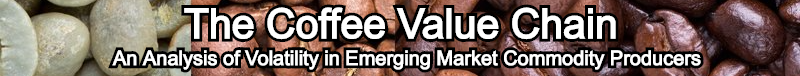

In [13]:
coffee_dashboard.servable()